# Calculate Price Elasticity of Demand

In [25]:
import pandas as pd
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
final_sell_calendar_households = pd.read_csv('final_sell_calendar_households.csv')

In [4]:
final_sell_calendar_hobbies = pd.read_csv('final_sell_calendar_hobbies.csv')

In [5]:
final_sell_calendar_foods = pd.read_csv('final_sell_calendar_foods.csv')

In [10]:
def calculate_ped(group):
    X = sm.add_constant(group['sell_price'])
    model = sm.OLS(group['sold'], X).fit()
    price_coef = model.params['sell_price']
    mean_sellprice = np.mean(group['sell_price'])
    mean_quantity = np.mean(group['sold'])
    ped = price_coef * (mean_sellprice / mean_quantity)
    return ped

## Calculate PED for hobbies items

In [8]:
final_sell_calendar_hobbies =final_sell_calendar_hobbies.drop(final_sell_calendar_hobbies.columns[0], axis =1)

In [9]:
final_sell_calendar_hobbies

,id,wm_yr_wk,sell_price,d,year,month,wday,date,amount,number
0,HOBBIES_1_001_CA_1,11325,9.58,d_897,2013,7,1,2013-07-13,0,897
1,HOBBIES_1_001_CA_1,11325,9.58,d_898,2013,7,2,2013-07-14,0,898
2,HOBBIES_1_001_CA_1,11325,9.58,d_899,2013,7,3,2013-07-15,0,899
3,HOBBIES_1_001_CA_1,11325,9.58,d_900,2013,7,4,2013-07-16,0,900
4,HOBBIES_1_001_CA_1,11325,9.58,d_901,2013,7,5,2013-07-17,0,901
...,...,...,...,...,...,...,...,...,...,...
8642680,HOBBIES_2_148_WI_3,11105,0.97,d_31,2011,2,3,2011-02-28,0,31
8642681,HOBBIES_2_148_WI_3,11105,0.97,d_32,2011,3,4,2011-03-01,0,32
8642682,HOBBIES_2_148_WI_3,11105,0.97,d_33,2011,3,5,2011-03-02,0,33
8642683,HOBBIES_2_148_WI_3,11105,0.97,d_34,2011,3,6,2011-03-03,0,34


In [10]:
final_sell_calendar_hobbies[['cat_id','dept_id','item_id', 'state_id','store_id']] = final_sell_calendar_hobbies['id'].str.split('_', expand=True)

In [15]:
ped_id = final_sell_calendar_hobbies.groupby('id').apply(calculate_ped)
print(ped_id)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


PED by id
id
HOBBIES_1_001_CA_1    -5.097742
HOBBIES_1_001_CA_2    35.232799
HOBBIES_1_001_CA_3    34.909486
HOBBIES_1_001_CA_4    -4.440415
HOBBIES_1_001_TX_1     0.833142
                        ...    
HOBBIES_2_149_TX_2    -1.109734
HOBBIES_2_149_TX_3    -0.940017
HOBBIES_2_149_WI_1    -1.222426
HOBBIES_2_149_WI_2    -0.790498
HOBBIES_2_149_WI_3    -1.312173
Length: 5650, dtype: float64


In [17]:
ped_item_id = final_sell_calendar_hobbies.groupby('item_id').apply(calculate_ped)
ped_item_id = ped_item_id.to_frame()
ped_item_id = ped_item_id.reset_index()

PED by item id
item_id
001    3.978094
002    0.376649
003   -1.100386
004    2.916829
005   -3.049954
         ...   
420    0.012902
421   -2.901577
422   -2.203539
423   -0.878666
424    1.420512
Length: 420, dtype: float64


In [22]:
ped_item_dept_id = final_sell_calendar_hobbies.groupby(['item_id','dept_id']).apply(calculate_ped)
ped_item_dept_id = ped_item_dept_id.to_frame()
ped_item_dept_id =ped_item_dept_id.reset_index()

PED by item id and dept id
item_id  dept_id
001      1         -6.313660
         2         -0.151866
002      1          1.685968
         2          0.218097
003      1         -0.221408
                      ...   
420      1          0.012902
421      1         -2.901577
422      1         -2.203539
423      1         -0.878666
424      1          1.420512
Length: 565, dtype: float64


In [40]:
ped_item_dept_state_id = final_sell_calendar_hobbies.groupby(['item_id','dept_id','state_id']).apply(calculate_ped)
ped_item_dept_state_id = ped_item_dept_state_id.to_frame()
ped_item_dept_state_id = ped_item_dept_state_id.reset_index()

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
ped_item_dept_state_store_id = final_sell_calendar_hobbies.groupby(['item_id','dept_id','state_id','store_id']).apply(calculate_ped)
ped_item_dept_state_store_id = ped_item_dept_state_store_id.to_frame()
ped_item_dept_state_store_id = ped_item_dept_state_store_id.reset_index()

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
a = ped_item_id.merge(ped_item_dept_id,left_on = 'item_id', right_on='item_id')
b = a.merge(ped_item_dept_state_id,left_on =['item_id','dept_id'],right_on =['item_id','dept_id'])

,item_id,0_x,dept_id,0_y
0,001,3.978094,1,-6.313660
1,001,3.978094,2,-0.151866
2,002,0.376649,1,1.685968
3,002,0.376649,2,0.218097
4,003,-1.100386,1,-0.221408
...,...,...,...,...
560,420,0.012902,1,0.012902
561,421,-2.901577,1,-2.901577
562,422,-2.203539,1,-2.203539
563,423,-0.878666,1,-0.878666


In [87]:
c = b.merge(ped_item_dept_state_store_id,left_on =['item_id','dept_id','state_id'],right_on =['item_id','dept_id','state_id'])
c

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,item_id,0_x,dept_id,0_y,state_id,0_x,store_id,0_y
0,001,3.978094,1,-6.313660,CA,-4.384036,1,-5.097742
1,001,3.978094,1,-6.313660,CA,-4.384036,2,35.232799
2,001,3.978094,1,-6.313660,CA,-4.384036,3,34.909486
3,001,3.978094,1,-6.313660,CA,-4.384036,4,-4.440415
4,001,3.978094,1,-6.313660,TX,0.174109,1,0.833142
...,...,...,...,...,...,...,...,...
5645,424,1.420512,1,1.420512,TX,-2.743452,2,-1.997759
5646,424,1.420512,1,1.420512,TX,-2.743452,3,-0.580792
5647,424,1.420512,1,1.420512,WI,-3.536496,1,-3.177566
5648,424,1.420512,1,1.420512,WI,-3.536496,2,-2.644528


In [88]:
hobbies_ped = c.rename(columns={"0_x": "a", "0_y": "b", "0_y": "c"})

In [90]:
hobbies_ped.to_csv('hobbies_ped.csv')

## Calculate PED for foods items

In [3]:
foods_df = pd.read_csv('foods_df.csv')

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
foods_df =foods_df.drop(foods_df.columns[0],axis=1)

In [7]:
foods_df_2 = foods_df.dropna(subset = ['sell_price'])

In [21]:
foods_df_2.head(5)

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.00
1,1613,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,7.88
2,1614,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.88
4,1616,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.94
5,1617,FOODS_1_006_CA_1_validation,FOODS_1_006,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.97


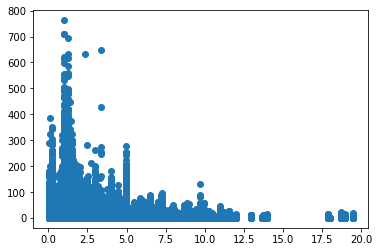

In [32]:
# We can see the distribution of price and quantity
# when price is low, quantity sold is higher
plt.scatter(foods_df_2['sell_price'],foods_df_2['sold'])
plt.show()

In [11]:
# How each specific food items react to price changes.
# Ex: apple in Mcity.
ped_id_food =foods_df_2.groupby('id').apply(calculate_ped)
print(ped_id_food)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


id
FOODS_1_001_CA_1_validation   -3.395525
FOODS_1_001_CA_2_validation   -4.022723
FOODS_1_001_CA_3_validation   -1.805704
FOODS_1_001_CA_4_validation   -2.857772
FOODS_1_001_TX_1_validation   -1.110851
                                 ...   
FOODS_3_827_TX_2_validation    1.000000
FOODS_3_827_TX_3_validation   -3.714840
FOODS_3_827_WI_1_validation    1.000000
FOODS_3_827_WI_2_validation    1.000000
FOODS_3_827_WI_3_validation    1.000000
Length: 14370, dtype: float64


In [60]:
# How each type of food item react to price changes.
# Ex: Apple in the whole Australia.
ped_item_id_food =foods_df_2.groupby('item_id').apply(calculate_ped)
print(ped_item_id_food)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


item_id
FOODS_1_001   -3.243099
FOODS_1_002    0.351640
FOODS_1_003   -3.270178
FOODS_1_004   -3.543704
FOODS_1_005    1.188883
                 ...   
FOODS_3_823   -2.578088
FOODS_3_824    1.205180
FOODS_3_825   -5.846464
FOODS_3_826    3.399996
FOODS_3_827   -1.053623
Length: 1437, dtype: float64


In [16]:
# How foods in each state react to price changes.
# Ex: Foods (apple,orange,banana...) in Victoria.
ped_state_item_id_food =foods_df_2.groupby('state_id').apply(calculate_ped)
print(ped_state_item_id_food)

state_id
CA   -0.561844
TX   -0.598503
WI   -0.641968
dtype: float64


In [17]:
# How foods in each store react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_store_item_id_food =foods_df_2.groupby('store_id').apply(calculate_ped)
print(ped_store_item_id_food)

store_id
CA_1   -0.574471
CA_2   -0.508451
CA_3   -0.598783
CA_4   -0.510226
TX_1   -0.601425
TX_2   -0.616935
TX_3   -0.574176
WI_1   -0.585910
WI_2   -0.616041
WI_3   -0.711130
dtype: float64


In [18]:
# How foods in each dept react to price changes.
# Ex: Foods (apple,orange,banana...) in all dept 1,2,3 including all woolies in Aus.
ped_dept_item_id_food =foods_df_2.groupby('dept_id').apply(calculate_ped)
print(ped_dept_item_id_food)

dept_id
FOODS_1   -0.638390
FOODS_2   -0.481386
FOODS_3   -0.594738
dtype: float64


In [34]:
ped_item_dept_id_food =foods_df_2.groupby(['item_id','dept_id']).apply(calculate_ped)
print(ped_item_dept_id_food)

item_id      dept_id
FOODS_1_001  FOODS_1   -3.243099
FOODS_1_002  FOODS_1    0.351640
FOODS_1_003  FOODS_1   -3.270178
FOODS_1_004  FOODS_1   -3.543704
FOODS_1_005  FOODS_1    1.188883
                          ...   
FOODS_3_823  FOODS_3   -2.578088
FOODS_3_824  FOODS_3    1.205180
FOODS_3_825  FOODS_3   -5.846464
FOODS_3_826  FOODS_3    3.399996
FOODS_3_827  FOODS_3   -1.053623
Length: 1437, dtype: float64


In [65]:
ped_item_store_id_food =foods_df_2.groupby(['item_id','store_id']).apply(calculate_ped)
print(ped_item_store_id_food)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


item_id      store_id
FOODS_1_001  CA_1       -3.395525
             CA_2       -4.022723
             CA_3       -1.805704
             CA_4       -2.857772
             TX_1       -1.110851
                           ...   
FOODS_3_827  TX_2        1.000000
             TX_3       -3.714840
             WI_1        1.000000
             WI_2        1.000000
             WI_3        1.000000
Length: 14370, dtype: float64


In [33]:
ped_item_state_id_food =foods_df_2.groupby(['item_id','state_id']).apply(calculate_ped)
print(ped_item_state_id_food)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


item_id      state_id
FOODS_1_001  CA         -3.165005
             TX         -2.207560
             WI         -5.316850
FOODS_1_002  CA          0.607149
             TX         -2.417406
                           ...   
FOODS_3_826  TX          3.139472
             WI          1.000000
FOODS_3_827  CA          1.000000
             TX         -7.165047
             WI          1.000000
Length: 4311, dtype: float64


In [61]:
ped_item_id_food = ped_item_id_food.to_frame().reset_index()

In [62]:
ped_item_id_food 

,item_id,0
0,FOODS_1_001,-3.243099
1,FOODS_1_002,0.351640
2,FOODS_1_003,-3.270178
3,FOODS_1_004,-3.543704
4,FOODS_1_005,1.188883
...,...,...
1432,FOODS_3_823,-2.578088
1433,FOODS_3_824,1.205180
1434,FOODS_3_825,-5.846464
1435,FOODS_3_826,3.399996


In [66]:
ped_item_store_id_food = ped_item_store_id_food.to_frame().reset_index()

In [67]:
ped_item_store_id_food

,item_id,store_id,0
0,FOODS_1_001,CA_1,-3.395525
1,FOODS_1_001,CA_2,-4.022723
2,FOODS_1_001,CA_3,-1.805704
3,FOODS_1_001,CA_4,-2.857772
4,FOODS_1_001,TX_1,-1.110851
...,...,...,...
14365,FOODS_3_827,TX_2,1.000000
14366,FOODS_3_827,TX_3,-3.714840
14367,FOODS_3_827,WI_1,1.000000
14368,FOODS_3_827,WI_2,1.000000


In [72]:
ped_item_state_id_food = ped_item_state_id_food.to_frame().reset_index().reset_index()

In [73]:
ped_item_state_id_food

,item_id,state_id,0
0,FOODS_1_001,CA,-3.165005
1,FOODS_1_001,TX,-2.207560
2,FOODS_1_001,WI,-5.316850
3,FOODS_1_002,CA,0.607149
4,FOODS_1_002,TX,-2.417406
...,...,...,...
4306,FOODS_3_826,TX,3.139472
4307,FOODS_3_826,WI,1.000000
4308,FOODS_3_827,CA,1.000000
4309,FOODS_3_827,TX,-7.165047


In [78]:
a = ped_item_id_food.merge(ped_item_state_id_food,left_on ='item_id',right_on = 'item_id')

In [79]:
a

,item_id,0_x,state_id,0_y
0,FOODS_1_001,-3.243099,CA,-3.165005
1,FOODS_1_001,-3.243099,TX,-2.207560
2,FOODS_1_001,-3.243099,WI,-5.316850
3,FOODS_1_002,0.351640,CA,0.607149
4,FOODS_1_002,0.351640,TX,-2.417406
...,...,...,...,...
4306,FOODS_3_826,3.399996,TX,3.139472
4307,FOODS_3_826,3.399996,WI,1.000000
4308,FOODS_3_827,-1.053623,CA,1.000000
4309,FOODS_3_827,-1.053623,TX,-7.165047


In [90]:
ped_item_store_id_food['state_id'] = ped_item_store_id_food['store_id'].str[:2]

In [91]:
ped_item_store_id_food

,item_id,store_id,0,state_id
0,FOODS_1_001,CA_1,-3.395525,CA
1,FOODS_1_001,CA_2,-4.022723,CA
2,FOODS_1_001,CA_3,-1.805704,CA
3,FOODS_1_001,CA_4,-2.857772,CA
4,FOODS_1_001,TX_1,-1.110851,TX
...,...,...,...,...
14365,FOODS_3_827,TX_2,1.000000,TX
14366,FOODS_3_827,TX_3,-3.714840,TX
14367,FOODS_3_827,WI_1,1.000000,WI
14368,FOODS_3_827,WI_2,1.000000,WI


In [92]:
b = a.merge(ped_item_store_id_food,left_on =['item_id','state_id'],right_on = ['item_id','state_id'])

In [94]:
b.to_csv('food_ped')

In [ ]:
ped_item_id = final_sell_calendar_foods.groupby('item_id').apply(calculate_ped)
ped_item_id = ped_item_id.to_frame()
ped_item_id = ped_item_id.reset_index()

In [ ]:
ped_item_dept_id = final_sell_calendar_foods.groupby(['item_id','dept_id']).apply(calculate_ped)
ped_item_dept_id = ped_item_dept_id.to_frame()
ped_item_dept_id =ped_item_dept_id.reset_index()

In [ ]:
ped_item_dept_state_id = final_sell_calendar_foods.groupby(['item_id','dept_id','state_id']).apply(calculate_ped)
ped_item_dept_state_id = ped_item_dept_state_id.to_frame()
ped_item_dept_state_id = ped_item_dept_state_id.reset_index()

In [ ]:
ped_item_dept_state_store_id = final_sell_calendar_foods.groupby(['item_id','dept_id','state_id','store_id']).apply(calculate_ped)
ped_item_dept_state_store_id = ped_item_dept_state_store_id.to_frame()
ped_item_dept_state_store_id = ped_item_dept_state_store_id.reset_index()

In [ ]:
a = ped_item_id.merge(ped_item_dept_id,left_on = 'item_id', right_on='item_id')
a

In [116]:
final_sell_calendar_foods

,id,wm_yr_wk,sell_price,d,year,month,wday,date,amount,number,cat_id,dept_id
0,FOODS_1_001_CA_1,11325,2.24,d_897,2013,7,1,2013-07-13,2,897,FOODS,1
1,FOODS_1_001_CA_1,11325,2.24,d_898,2013,7,2,2013-07-14,0,898,FOODS,1
2,FOODS_1_001_CA_1,11325,2.24,d_899,2013,7,3,2013-07-15,1,899,FOODS,1
3,FOODS_1_001_CA_1,11325,2.24,d_900,2013,7,4,2013-07-16,3,900,FOODS,1
4,FOODS_1_001_CA_1,11325,2.24,d_901,2013,7,5,2013-07-17,0,901,FOODS,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21395948,FOODS_3_825_WI_3,11105,4.00,d_31,2011,2,3,2011-02-28,1,31,FOODS,3
21395949,FOODS_3_825_WI_3,11105,4.00,d_32,2011,3,4,2011-03-01,2,32,FOODS,3
21395950,FOODS_3_825_WI_3,11105,4.00,d_33,2011,3,5,2011-03-02,2,33,FOODS,3
21395951,FOODS_3_825_WI_3,11105,4.00,d_34,2011,3,6,2011-03-03,2,34,FOODS,3


## Caculate PED for households items

In [102]:
final_sell_calendar_households =final_sell_calendar_households.drop(final_sell_calendar_households.columns[0],axis=1)

In [104]:
final_sell_calendar_households[['cat_id','dept_id','item_id', 'state_id','store_id']] = final_sell_calendar_households['id'].str.split('_', expand=True)

In [106]:
final_sell_calendar_households.to_csv('final_sell_calendar_households_2.csv')

In [109]:
final_sell_calendar_households 

,id,wm_yr_wk,sell_price,d,year,month,wday,date,amount,number,cat_id,dept_id,item_id,state_id,store_id
0,HOUSEHOLD_1_001_CA_1,11325,5.97,d_897,2013,7,1,2013-07-13,0,897,HOUSEHOLD,1,001,CA,1
1,HOUSEHOLD_1_001_CA_1,11325,5.97,d_898,2013,7,2,2013-07-14,0,898,HOUSEHOLD,1,001,CA,1
2,HOUSEHOLD_1_001_CA_1,11325,5.97,d_899,2013,7,3,2013-07-15,0,899,HOUSEHOLD,1,001,CA,1
3,HOUSEHOLD_1_001_CA_1,11325,5.97,d_900,2013,7,4,2013-07-16,0,900,HOUSEHOLD,1,001,CA,1
4,HOUSEHOLD_1_001_CA_1,11325,5.97,d_901,2013,7,5,2013-07-17,0,901,HOUSEHOLD,1,001,CA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15989314,HOUSEHOLD_2_516_WI_3,11105,5.94,d_31,2011,2,3,2011-02-28,0,31,HOUSEHOLD,2,516,WI,3
15989315,HOUSEHOLD_2_516_WI_3,11105,5.94,d_32,2011,3,4,2011-03-01,0,32,HOUSEHOLD,2,516,WI,3
15989316,HOUSEHOLD_2_516_WI_3,11105,5.94,d_33,2011,3,5,2011-03-02,0,33,HOUSEHOLD,2,516,WI,3
15989317,HOUSEHOLD_2_516_WI_3,11105,5.94,d_34,2011,3,6,2011-03-03,0,34,HOUSEHOLD,2,516,WI,3


In [110]:
ped_id_hh = final_sell_calendar_households.groupby('id').apply(calculate_ped)
ped_id_hh = ped_id_hh.to_frame()
ped_id_hh = ped_id_hh.reset_index()

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [111]:
ped_id_hh

,id,0
0,HOUSEHOLD_1_001_CA_1,-0.994784
1,HOUSEHOLD_1_001_CA_2,10.577096
2,HOUSEHOLD_1_001_CA_3,3.494343
3,HOUSEHOLD_1_001_CA_4,0.134957
4,HOUSEHOLD_1_001_TX_1,-2.200022
...,...,...
10465,HOUSEHOLD_2_516_TX_2,-5.833195
10466,HOUSEHOLD_2_516_TX_3,1.000000
10467,HOUSEHOLD_2_516_WI_1,1.000000
10468,HOUSEHOLD_2_516_WI_2,1.000000


In [112]:
ped_item_id_hh = final_sell_calendar_households.groupby(['item_id']).apply(calculate_ped)
ped_item_id_hh = ped_item_id_hh.to_frame()
ped_item_id_hh = ped_item_id_hh.reset_index()

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
ped_item_id_hh

,item_id,0
0,001,0.561159
1,002,-0.445138
2,003,-4.671168
3,004,-1.487517
4,005,2.282357
...,...,...
536,537,-0.545878
537,538,1.000000
538,539,0.744237
539,540,1.270025


In [118]:
ped_item_dept_id_hh = final_sell_calendar_households.groupby(['item_id','dept_id']).apply(calculate_ped)
ped_item_dept_id_hh = ped_item_dept_id_hh.to_frame()
ped_item_dept_id_hh = ped_item_dept_id_hh.reset_index()

In [119]:
ped_item_dept_id_hh

,item_id,dept_id,0
0,001,1,1.609250
1,001,2,-1.048037
2,002,1,-0.215320
3,002,2,-7.491919
4,003,1,1.000000
...,...,...,...
1042,537,1,-0.545878
1043,538,1,1.000000
1044,539,1,0.744237
1045,540,1,1.270025


In [ ]:
ped_item_dept_id_hh = final_sell_calendar_households.groupby(['item_id','dept_id']).apply(calculate_ped)
ped_item_dept_id_hh = ped_item_dept_id_hh.to_frame()
ped_item_dept_id_hh = ped_item_dept_id_hh.reset_index()